In [22]:
import matplotlib.pyplot as plt
import math
import random
import numpy as np

# Реализация тестируемых методов и проверок

In [23]:
def mid_squares(start_number, n):
    sum_sings = len(str(start_number))
    BSV = []
    BSV_limited = []
    BSV_value = 0
    temp_value = str(round(math.pow(start_number, 2)))
    len_str = 0
    for i in range(0, n - 1):
        if(BSV_value):
            temp_value = str(round(math.pow(BSV_value, 2)))
        while 1:
            len_str = len(temp_value)
            if len_str != 2 * sum_sings:
                temp_value = "0" + temp_value
            else:
                break
        start_str = round((len_str - sum_sings) / 2)
        end_str = round(start_str + sum_sings)
        BSV_value = int(temp_value[start_str:end_str])
        BSV.append(BSV_value)
    for i in BSV:
        BSV_limited.append(i / math.pow(10, len_str / 2))
    return BSV_limited

In [24]:
def multiplicative_congruent(m, k, A0):
    T = m-1
    A = []
    z = []
    A_value = k * A0 % m
    for i in range(0, T - 1):
        if(i):
            A_value = k * A[i - 1] % m
        z.append(A_value / m)
        A.append(A_value)
    return z

In [25]:
def uniformity_testing(N, BSV, n):
    number_hits = []
    hit_rate = []
    X = [i/N for i in range(N)]
    for i in X:
        sum_n = 0
        for j in BSV:
            if i <= j < i + 1:
                sum_n += 1
        number_hits.append(sum_n)
    for i in number_hits:
        hit_rate.append(i / n)
    return X, hit_rate

In [26]:
def independence_testing(BSV, s, n):
    sum_bsv = 0
    for i in range(n - s - 1):
        sum_bsv += BSV[i] * BSV[i + s]
    R = (12 / (n - s)) * sum_bsv - 3
    return R

# Независимость метода средних квадратов

In [27]:
s = 5
n = 1000 + s
start_number = 19944
BSV = mid_squares(start_number, n)
R = independence_testing(BSV, s, n)
print(R + 3)

0.11302623472200013


In [28]:
n = 10000 + s
BSV = mid_squares(start_number, n)
R = independence_testing(BSV, s, n)
print(R + 3)

0.011302623472199791


In [29]:
n = 100000 + s
BSV = mid_squares(start_number, n)
R = independence_testing(BSV, s, n)
print(R + 3)

0.0011302623472198015


# Равномерность метода средних квадратов

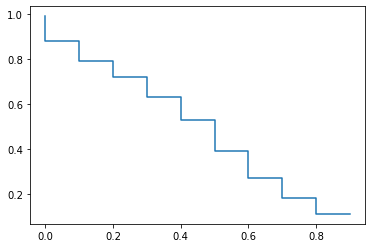

In [30]:
X_N = 10
n = 100
start_number = 19987654
BSV = mid_squares(start_number, n)
X, hit_rate = uniformity_testing(X_N, BSV, n)
plt.step(X, hit_rate)

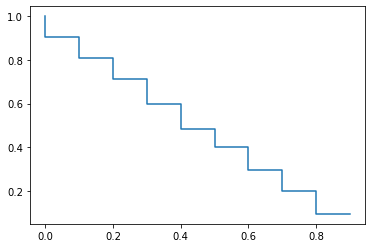

In [31]:
n = 1000
BSV = mid_squares(start_number, n)
X, hit_rate = uniformity_testing(X_N, BSV, n)
plt.step(X, hit_rate)

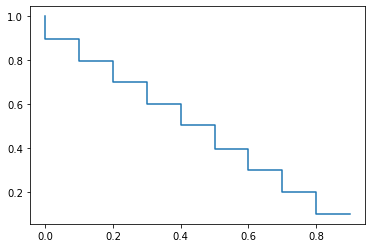

In [32]:
n = 10000
BSV = mid_squares(start_number, n)
X, hit_rate = uniformity_testing(X_N, BSV, n)
plt.step(X, hit_rate)

# Независимость метода мультикативного конгуэнтного

In [33]:
s = 10
n = 100 + s
k= 7
A0 = 54
Z = multiplicative_congruent(n, k, A0)
R = independence_testing(Z, s, n - 1)
print(R)

0.9767593288254428


In [34]:
n = 1000 + s
Z = multiplicative_congruent(n, k, A0)
R = independence_testing(Z, s, n - 1)
print(R)

0.19813808514915987


In [35]:
n = 10000000+s
Z = multiplicative_congruent(n, k, A0)
R = independence_testing(Z, s, n - 1)
print(R)

0.03146107969305456


# Равномерность мультикативного конгуэнтного метода

[0.6923076923076923, 0.8461538461538461, 0.9230769230769231, 0.46153846153846156, 0.23076923076923078, 0.6153846153846154, 0.3076923076923077, 0.15384615384615385, 0.07692307692307693, 0.5384615384615384, 0.7692307692307693]


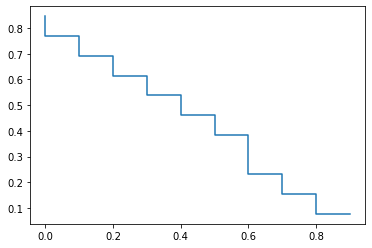

In [36]:
X_N = 10
n = 13
k= 7
A0 = 5
Z = multiplicative_congruent(n, k, A0)
print(Z)
X, hit_rate = uniformity_testing(X_N, Z, n)
plt.step(X, hit_rate)

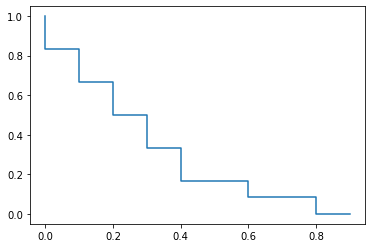

In [37]:
n = 1300
Z = multiplicative_congruent(n, k, A0)
X, hit_rate = uniformity_testing(X_N, Z, n)
plt.step(X, hit_rate)

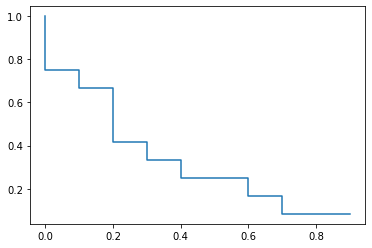

In [38]:
n = 13000
Z = multiplicative_congruent(n, k, A0)
X, hit_rate = uniformity_testing(X_N, Z, n)
plt.step(X, hit_rate)

# Математическое ожидание и дисперсия

In [39]:
def m_o(BSV):
    sum_BSV = 0
    for i in BSV:
        sum_BSV += i
    return sum_BSV / n

In [40]:
def disp(BSV, mo):
    sum_BSV = 0
    for i in BSV:
        sum_BSV += i * i
    return sum_BSV / n - mo ** 2

In [41]:
n = 10000
start_number = 1994312
BSV = mid_squares(start_number, n)
mo = m_o(BSV)
print(mo)
disp(BSV, mo)

0.4999003975599943


0.08212177767980541

In [42]:
X_N = 10
n = 13001
k= 7
A0 = 5
Z = multiplicative_congruent(n, k, A0)
mo = m_o(Z)
print(mo)
disp(Z, mo)

0.4999615118386432


0.09483005515637827